<a href="https://colab.research.google.com/github/zeynepersen/breast-cancer-classification/blob/main/breast_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem: Breast Cancer Classification

# Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Data Understanding

In [ ]:
data = load_breast_cancer()

df = pd.DataFrame(data=data.data, columns=data.feature_names)

df['target'] = data.target

In [ ]:
df.shape

(569, 31)

In [ ]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


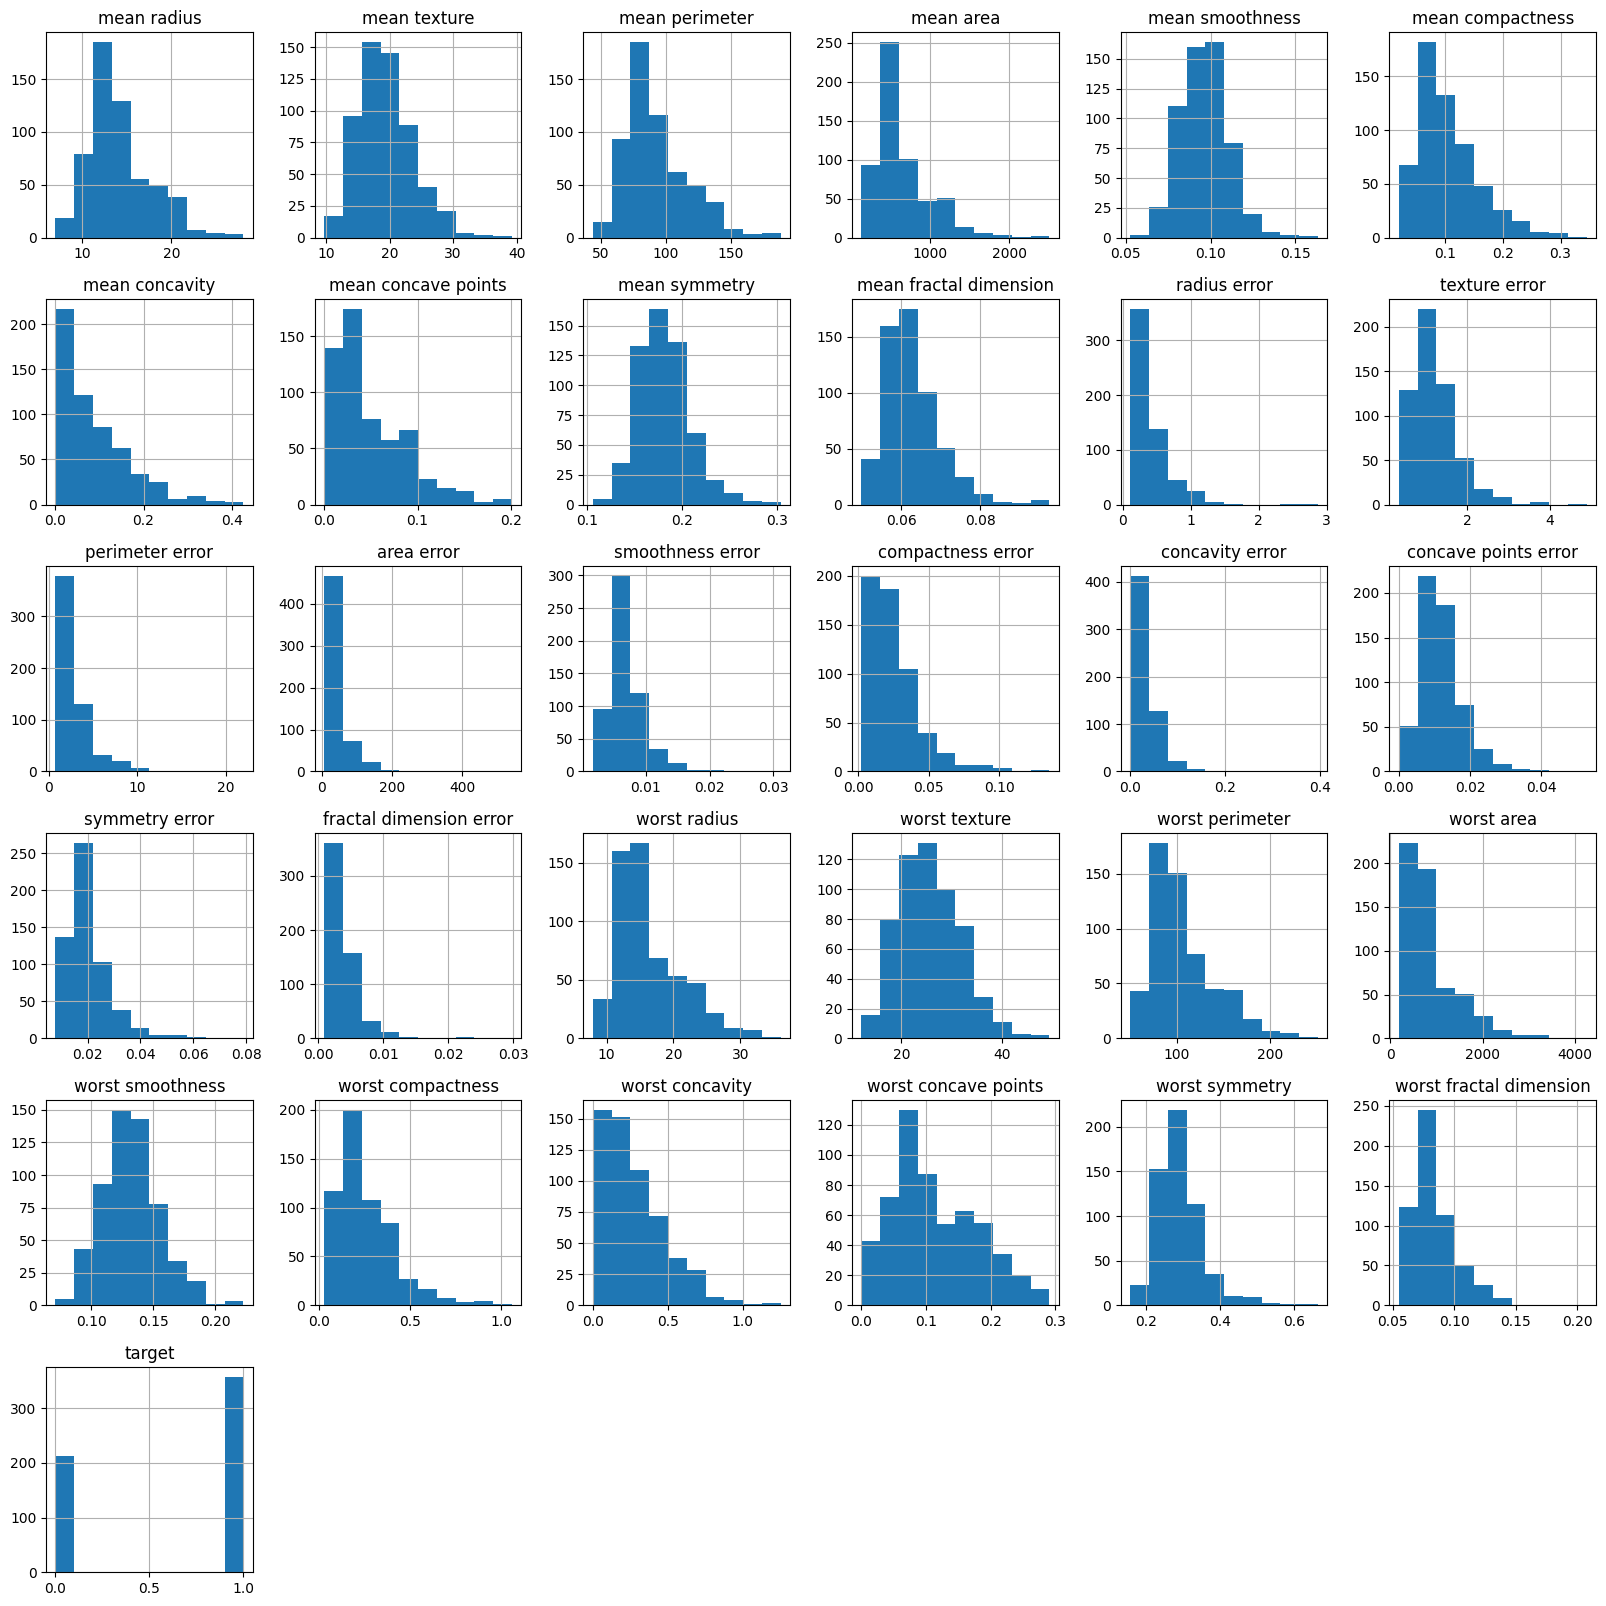

In [ ]:
df.hist(figsize=(20,20))
plt.show()

In [ ]:
df['target'].value_counts()

,count
target,
1,357
0,212


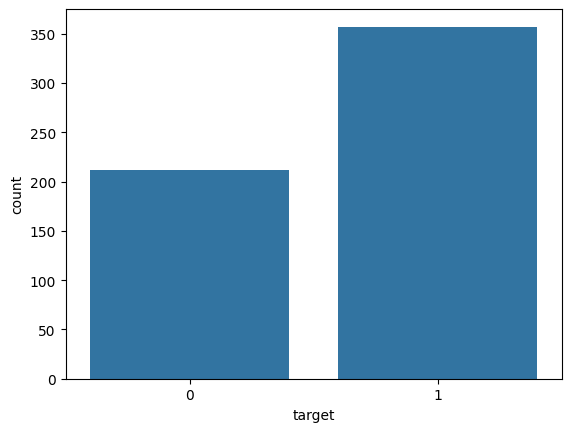

In [ ]:
sns.countplot(x='target', data=df)
plt.show()

In [ ]:
df.isnull().values.any()

False

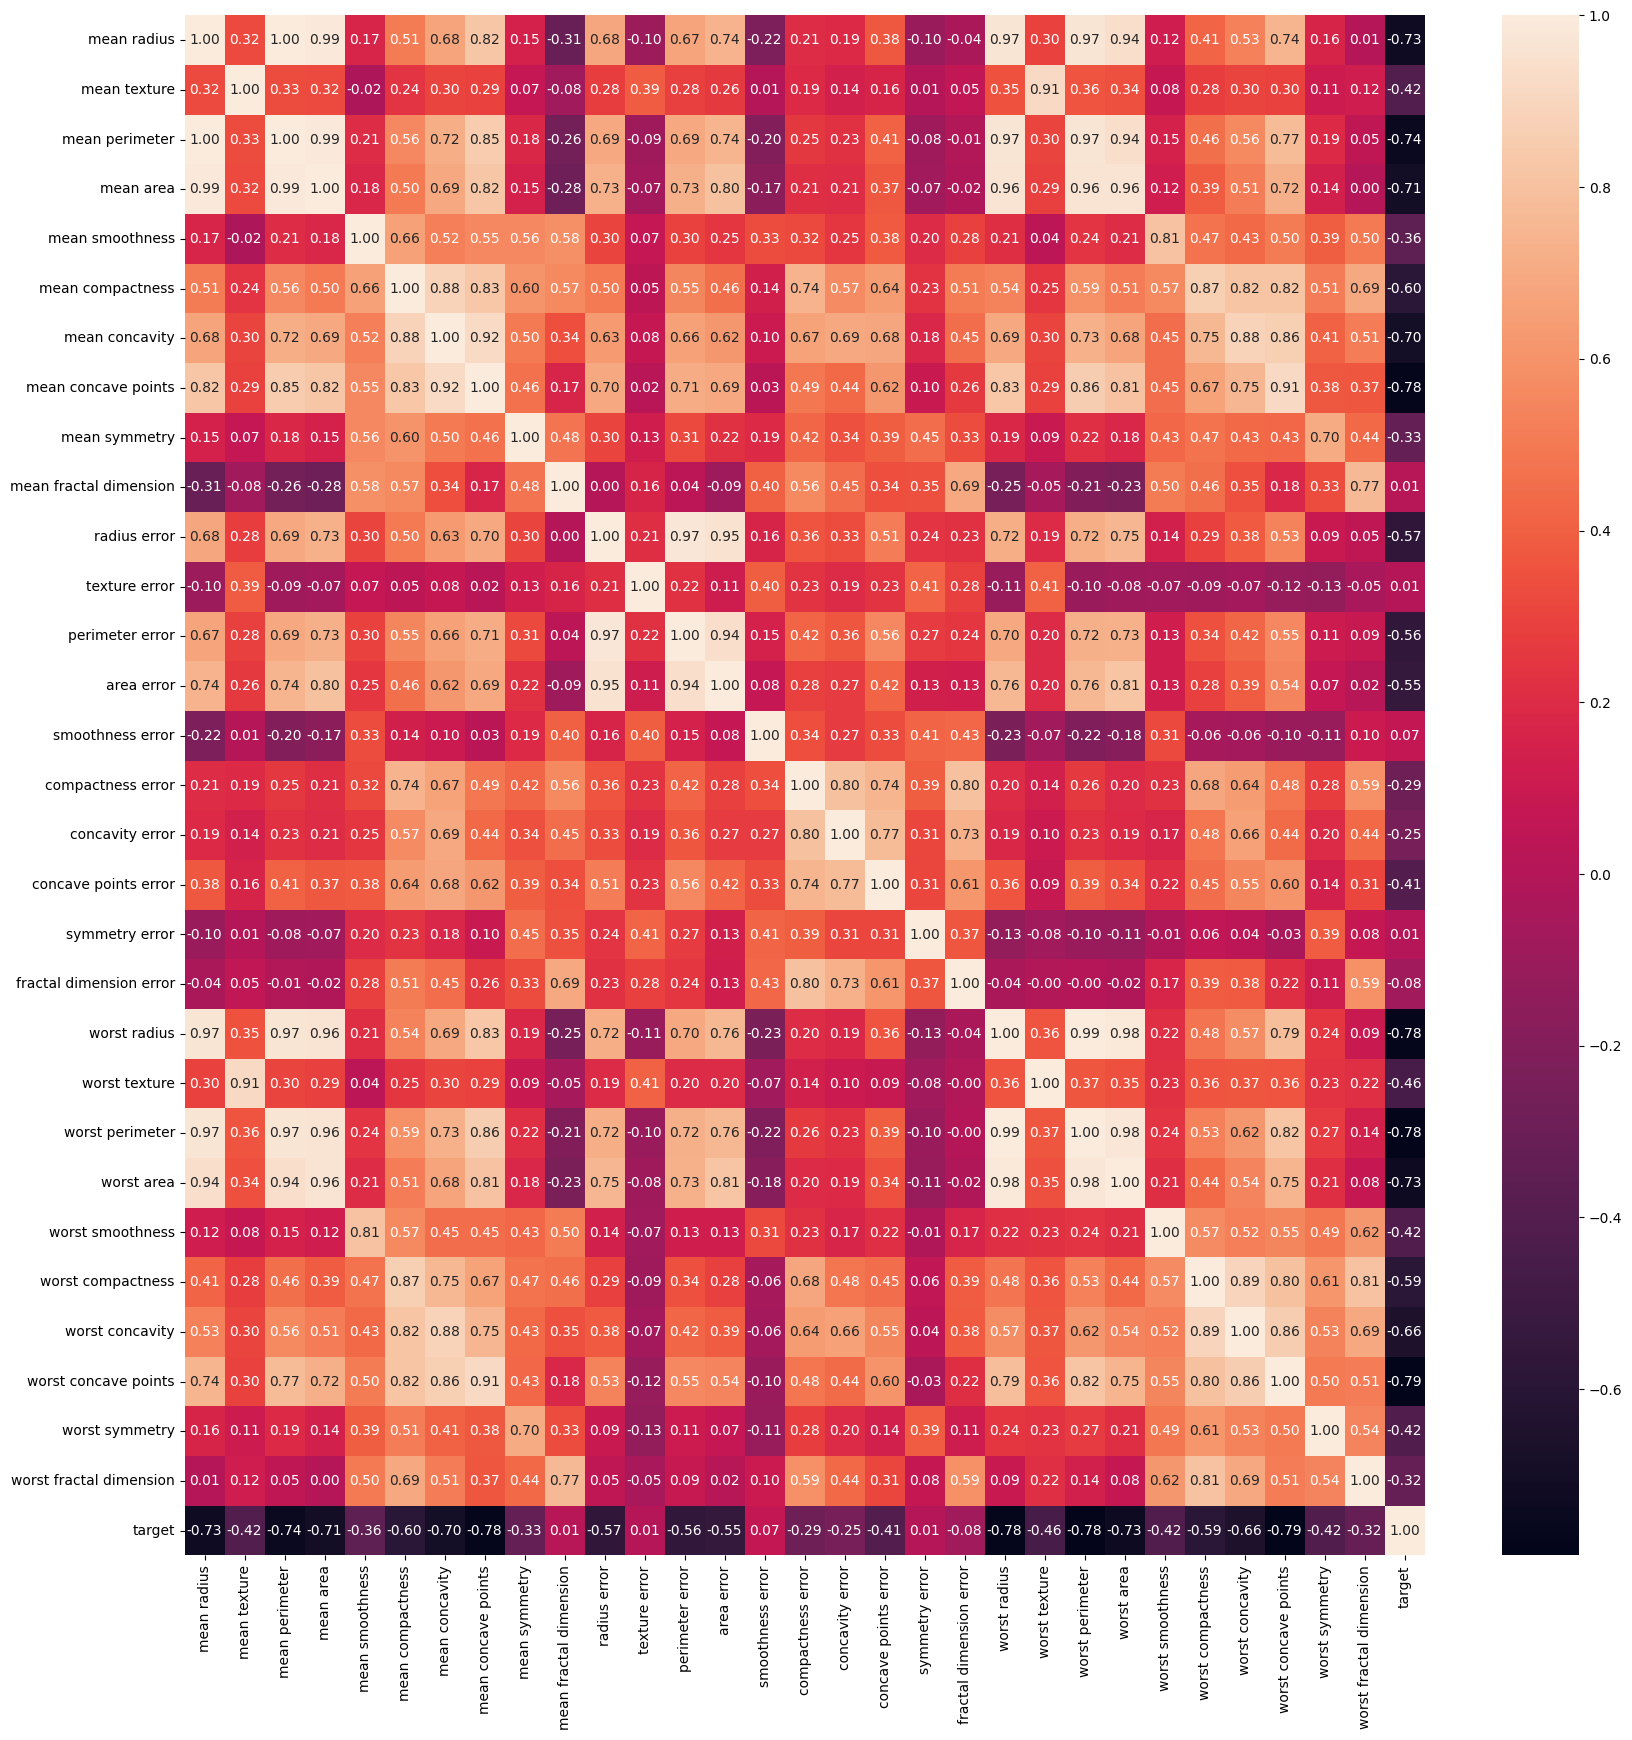

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.show()

# Data Preparation

In [ ]:
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Update weights and bias manual

## X, weights, bias and Learning Rate



In [ ]:
lr = 0.01

In [ ]:
X_scaled = scaler.transform(X)

In [ ]:
X_scaled[0:1]

array([[ 1.09638851, -2.06627179,  1.27258268,  0.97763237,  1.62902429,
         3.31943081,  2.66062611,  2.59927427,  2.21441274,  2.2151773 ,
         2.45000976, -0.54954429,  2.76990654,  2.40182654, -0.19324703,
         1.25923694,  0.65107966,  0.6324067 ,  1.15846219,  0.852186  ,
         1.90281735, -1.35442338,  2.32458312,  2.0139593 ,  1.33008201,
         2.66628739,  2.09069131,  2.31736261,  2.68853795,  1.96497709]])

In [ ]:
weights = np.random.normal(0, 1, 30)

In [ ]:
bias = 0.1

In [ ]:
weights

array([ 0.46758066,  0.99463424, -0.53917725, -0.94674597, -1.19201978,
       -1.58174487,  0.28781164, -0.29446637, -1.12729275, -0.7391733 ,
        1.731361  ,  1.31510015,  1.06733732, -0.01269849, -0.78373586,
       -0.41669862,  1.38532442, -1.02304914,  0.05136229,  0.01306178,
        1.95503156, -1.04325499, -0.42501992,  0.46801608,  1.01147307,
        0.21042374,  0.75375698,  0.26222022,  0.60797225,  1.38088389])

## z= np.dot(X, weights) + bias

In [ ]:
z = np.dot(X_scaled, weights) + bias

In [ ]:
z[0:5]

array([5.54303874, 4.0384754 , 1.83607315, 0.22619001, 1.30085804])

In [ ]:
len(z)

569

## Sigmoid and y_prob

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [ ]:
y_prob = sigmoid(z)

## Loss

In [ ]:
def compute_loss(y, y_pred):
    epsilon = 1e-5
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

In [ ]:
compute_loss(y, y_prob)

2.679049306556837

## Compute Gradients

In [ ]:
def compute_gradients(X, y, y_pred):
    return np.dot(X.T, (y_pred - y)) / len(y)

In [ ]:
grads = compute_gradients(X, y, y_prob)

In [ ]:
grads[0:5]

array([-2.40720132e-01, -1.41380251e+00, -6.49818920e-01,  9.50034022e+01,
       -1.36707901e-02])

In [ ]:
grads_b = np.mean(y_prob - y)

In [ ]:
new_weights = weights -lr * grads

In [ ]:
new_weights[0:5]

array([ 0.46998786,  1.00877226, -0.53267906, -1.89677999, -1.19188307])

In [ ]:
new_b = bias - lr * grads_b

# Functions

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    epsilon = 1e-5
    return -np.mean(y * np.log(y_pred + epsilon) + (1 - y) * np.log(1 - y_pred + epsilon))

def compute_gradients(X, y, y_pred):
    return np.dot(X.T, (y_pred - y)) / len(y)

def gradient_descent(X, y, lr=0.01, epochs=100):
    weights = np.zeros(X.shape[1])
    bias = 0

    for epoch in range(epochs):
        z = np.dot(X, weights) + bias

        y_pred = sigmoid(z)

        loss = compute_loss(y, y_pred)

        dw = compute_gradients(X, y, y_pred)

        db = np.mean(y_pred - y)

        weights -= lr * dw

        bias -= lr * db

        if (epoch + 1) % 10 == 0 or epoch == 0:

            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

    return weights, bias

def predict(X, weights, bias):

    z = np.dot(X, weights) + bias

    y_pred = sigmoid(z)

    return y_pred >= 0.5

# Training

In [ ]:
weights, bias = gradient_descent(X_train_scaled, y_train, lr=0.1, epochs=100)

Epoch 1/100, Loss: 0.6931271807599427
Epoch 10/100, Loss: 0.25829257199748934
Epoch 20/100, Loss: 0.1925340902995162
Epoch 30/100, Loss: 0.16355355112096442
Epoch 40/100, Loss: 0.14650143681274436
Epoch 50/100, Loss: 0.13500315830929985
Epoch 60/100, Loss: 0.12659437303841578
Epoch 70/100, Loss: 0.12010564582209671
Epoch 80/100, Loss: 0.114904422705863
Epoch 90/100, Loss: 0.11061556044528446
Epoch 100/100, Loss: 0.1070008407100545


# Performance Evaluation

In [ ]:
y_pred_valid = predict(X_val_scaled, weights, bias)

In [ ]:
accuracy = accuracy_score(y_val, y_pred_valid)

In [ ]:
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.9824561403508771
